# Predicting diamond prices based on the feature of diamonds.
## Phase 2: Statistical Modelling

#### Group Name: Group 57

#### Name(s) & ID(s) of Group Members:
- Eddie Ton (s3948609)
- Jabbar Baloghlan (s3890406)
- Tyler Xia (s3945694)
- Andy Than (s3947037)
- Huynh Pham (s3946066)

## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

In phase 1, we found the raw data of diamonds from Kaggle (Shivam Agrawal, 2021) which contains various details and properties of diamonds based off the Tiffany & Co's pricelist from 2017. With the data we set to normalised it and clean the data for analysis in which we made various data visualisations with the dataset as to achieve the goal of finding the relation between the diamond's properties and the price of diamonds. In phase 1 it highlighted that clarity, cut and carat seem to have a linear relationship towards the price of the diamonds, in phase 2 we aim to predict the prices of diamonds through these variables.

### Report Overview

The report will focus on adopting the data acquired from the previous phase, use it to create a statistical model, and comment on the findings of the research. It will feature the main driving factors (variates with the biggest impact) to ultimately create models and come up with the best assumptions to finding diamond prices

### Overview of Methodology

For the statistical modelling we will be doing, the best option is Multiple Linear Regression (MLR). It will consist of making predictive equations for each of the variates that affect diamond prices. The expected outcome is to have an exuation in a form of y = k + x1*bi1 + x2*bi2 ... + xn*bin, which could be used to predict diamond prices as closely to the real value as possible.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview

We will be using all features present with a minor focus on color to determine the possibility of linear regression from the data.

#### Module Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import requests
import io

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# df = pd.read_csv('diamonds_no_outliers.csv')
# # df = pd.read_csv('diamonds.csv') # test

# name of the dataset to be imported from our GitHub account
df_name = 'diamonds_no_outliers.csv'
df_url = 'https://raw.githubusercontent.com/Jobi060704/math_files/main/' + df_name
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

#### Data preparation

Before we graph the full model overview, the categorical features will be label encoded as seen in the phase 1 report. Our reasoning for this decision is that, the features have a clear ranking of best to worse. This was demonstrated in the data exploration of price and the features in phase 1.

Other changes:
- The index column was an error that was added by accident in phase 2.

In [17]:
label_df = df.copy()
label_df = label_df.drop(['Unnamed: 0'], axis=1)

label_df.Clarity[label_df.Clarity == 'I1'] = 1
label_df.Clarity[label_df.Clarity == 'SI2'] = 2
label_df.Clarity[label_df.Clarity == 'SI1'] = 3
label_df.Clarity[label_df.Clarity == 'VS2'] = 4
label_df.Clarity[label_df.Clarity == 'VS1'] = 5
label_df.Clarity[label_df.Clarity == 'VVS2'] = 6
label_df.Clarity[label_df.Clarity == 'VVS1'] = 7
label_df.Clarity[label_df.Clarity == 'IF'] = 8

label_df.Cut[label_df.Cut == 'Fair'] = 1
label_df.Cut[label_df.Cut == 'Good'] = 2
label_df.Cut[label_df.Cut == 'Very Good'] = 3
label_df.Cut[label_df.Cut == 'Premium'] = 4
label_df.Cut[label_df.Cut == 'Ideal'] = 5

label_df.Color[label_df.Color == 'J'] = 1
label_df.Color[label_df.Color == 'I'] = 2
label_df.Color[label_df.Color == 'H'] = 3
label_df.Color[label_df.Color == 'G'] = 4
label_df.Color[label_df.Color == 'F'] = 5
label_df.Color[label_df.Color == 'E'] = 6
label_df.Color[label_df.Color == 'D'] = 7

label_df.head(10)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
5,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
6,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
7,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39
8,0.30,2,1,3,64.0,55.0,339,4.25,4.28,2.73
9,0.23,5,1,5,62.8,56.0,340,3.93,3.90,2.46


### Feature Selection

To start, we need to create a base formula fitting for our model.

In [18]:
formula_string_indep_vars = ' + '.join(label_df.drop(columns='Price').columns)
formula_string = 'Price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  Price ~ Carat + Cut + Color + Clarity + Depth + Table + X + Y + Z


Now that we have defined our statistical model formula as a Python
string, we fit an OLS (ordinary least squares) model to our encoded
data.

In [19]:
model_full = sm.formula.ols(formula=formula_string, data=label_df)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:26:04   Log-Likelihood:            -4.0220e+05
No. Observations:               48436   AIC:                         8.044e+05
Df Residuals:                   48412   BIC:                         8.047e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4272.8267    758.053      5.637   

The full model has an adjusted R-squared value of 0.915, which means that 91% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant.

Now, well define a new dataframe for predicates and actuals. It will be used to make a scatterplot for residual observation.

In [20]:
residuals_full = pd.DataFrame({'actual': label_df['Price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.sample(10)

,actual,predicted,residual
29150,827,591.027439,235.972561
36134,1154,1566.045872,-412.045872
3882,3593,4275.143357,-682.143357
8556,4617,4887.290943,-270.290943
7066,4310,6560.017909,-2250.017909
5264,3927,4293.482505,-366.482505
2385,3234,3691.272263,-457.272263
10378,5018,4903.859846,114.140154
25081,694,1117.192910,-423.192910
46284,2394,2858.909535,-464.909535


Let's plot actual observations of price against the predicted values based on our previously written formula.

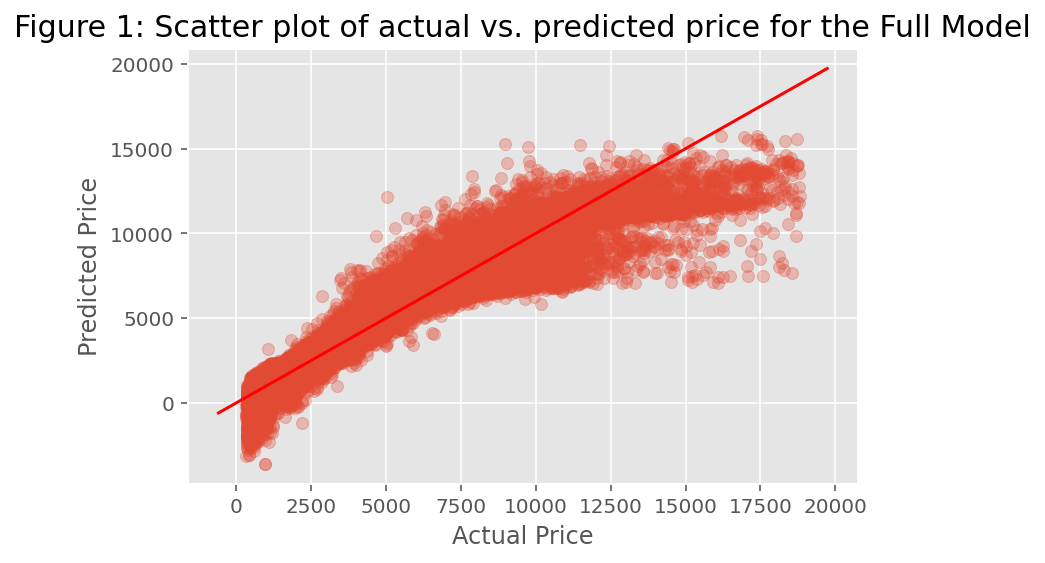

In [21]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 1: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

From Figure 1, we observe that the model produces most accurate results in ranges 1500-7500 even though after 7500, real values begin to deviate minorly.  

We will now check the diagnostics for the full model.

### Full Model Diagnostic Checks<a href="#Full-Model-Diagnostic-Checks" class="anchor-link"></a>

We would like to check whether there are indications of violations of
the regression assumptions, which are

1.  linearity of the relationship between target variable and the
    independent variables
2.  constant variance of the errors
3.  normality of the residual distribution
4.  statistical independence of the residuals

Let's first get a scatter plot of residuals (as a function of predicted `Price`).

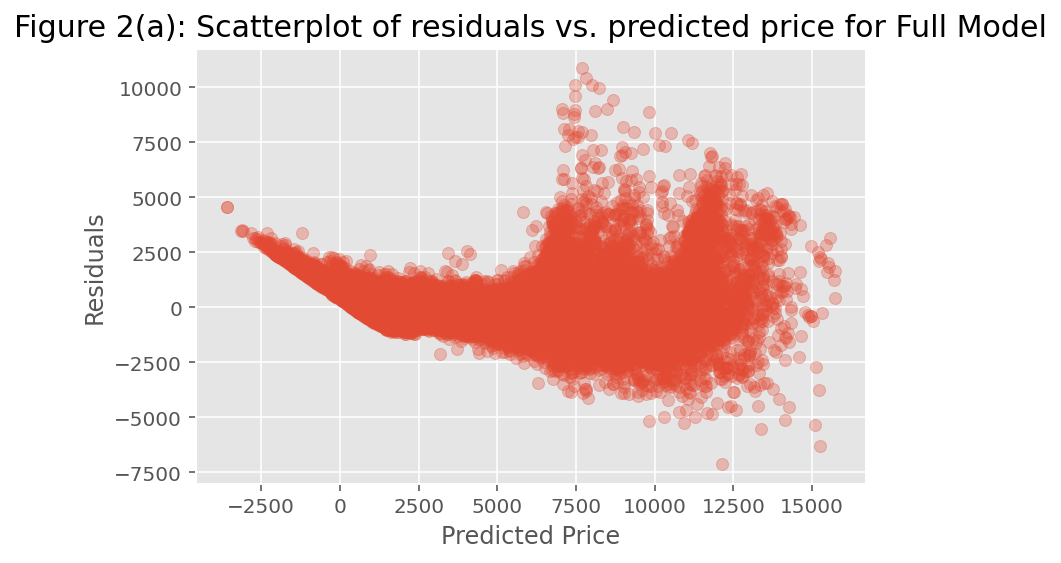

In [22]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

From Figure 2(a), we see that, rather than being mostly random and
centered around 0, the residuals show a expanding pattern, especially
when predicted price is over 7500. This pattern indicates that the constant
variability assumption of linear regression is not quite satisfied in
this case.

Let's now plot actual price vs. residuals.

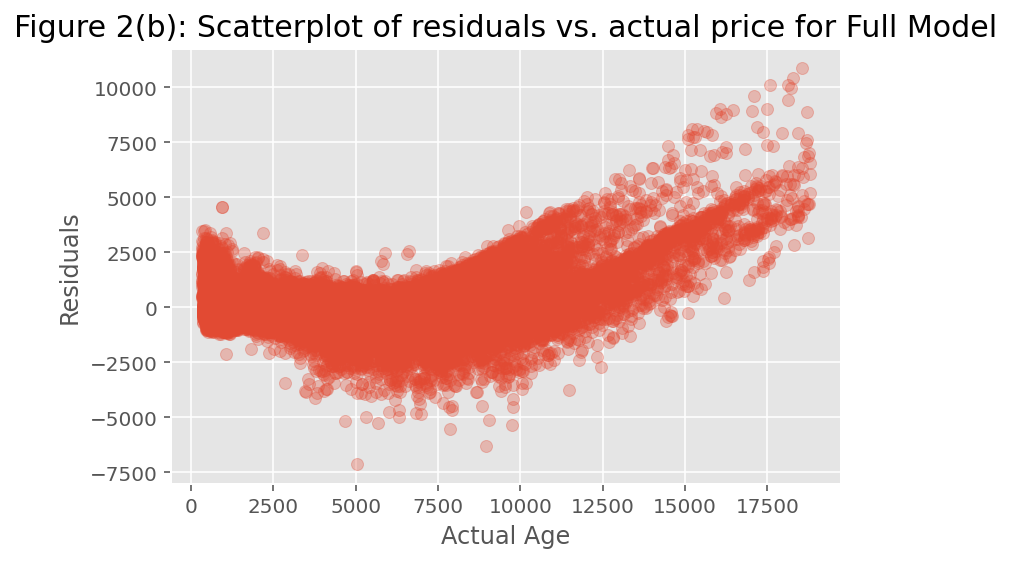

In [23]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Age');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

From Figure 2(b), we can see that although it starts as uniformely acceptable, the model starts to falter after the mark of 7500, with residues of up to 2500.

Let's overlay the histograms of actual vs. predicted price on the same plot.

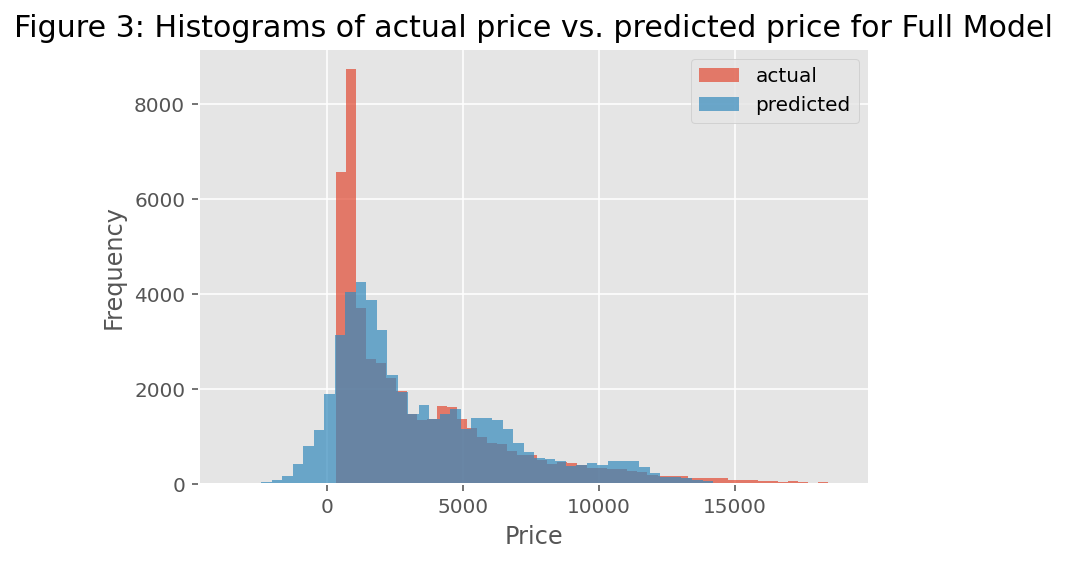

In [24]:
plt.hist(residuals_full['actual'], label='actual', bins=50, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=50, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual price vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

We notice that in Figure 3 the histogram demostration for predicted data is far advertly frequent and somewhat centered. This indicates how the predicted prices are focused on ranges of -1000 to 12500, even though real price are able to stretch more positively in price. Additionally, there are more observations of prices within the regions of 0 to 3000. The prediciton around this range are more reliable, as they match the highest frequency of the actual prices.

Let's now have look at the histogram of the residuals.

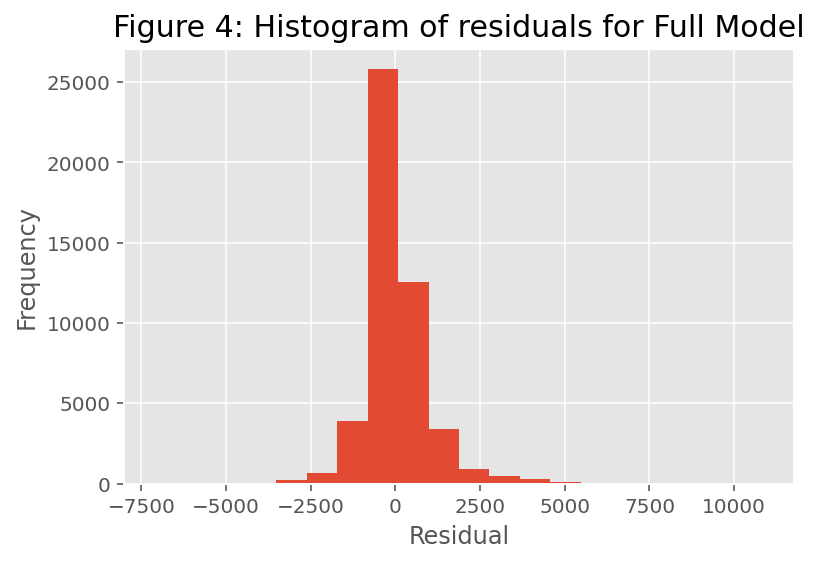

In [25]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From Figure 4, the histogram of residuals looks admittedly symmetric. Quite positively, it seems the normality assumption of linear regression is not significantly violated in this particular case, with residues mainly ranging from -1000 to +1000.

### Reduced Model Overview

For our reduced model, we will use the following code to remove insignificant features from our model calculation.

In [26]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=label_df).fit()

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = label_df).fit()
###

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Depth" with p-value 0.05232

***
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.383e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:26:08   Log-Likelihood:            -4.0220e+05
No. Observations:               48436   AIC:                         8.044e+05
Df Residuals:                   48413   BIC:                         8.047e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

After the reduction, we can observe that only 1/10000th of R squared was reduced, indicating a very minor impact.

Similar to what we did for the full model, let's define a new data frame for actual price vs. predicted price and the residuals for the reduced model.

In [27]:
residuals_reduced = pd.DataFrame({'actual': label_df['Price'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.sample(10)

,actual,predicted,residual
22918,14639,11169.257143,3469.742857
3806,3569,4710.798655,-1141.798655
2592,3276,4006.373561,-730.373561
17716,8062,8663.315391,-601.315391
27291,765,694.167804,70.832196
23544,17713,15177.798706,2535.201294
28951,816,1195.438153,-379.438153
33411,999,1233.345319,-234.345319
8210,4538,5874.087724,-1336.087724
15596,6830,5129.911737,1700.088263


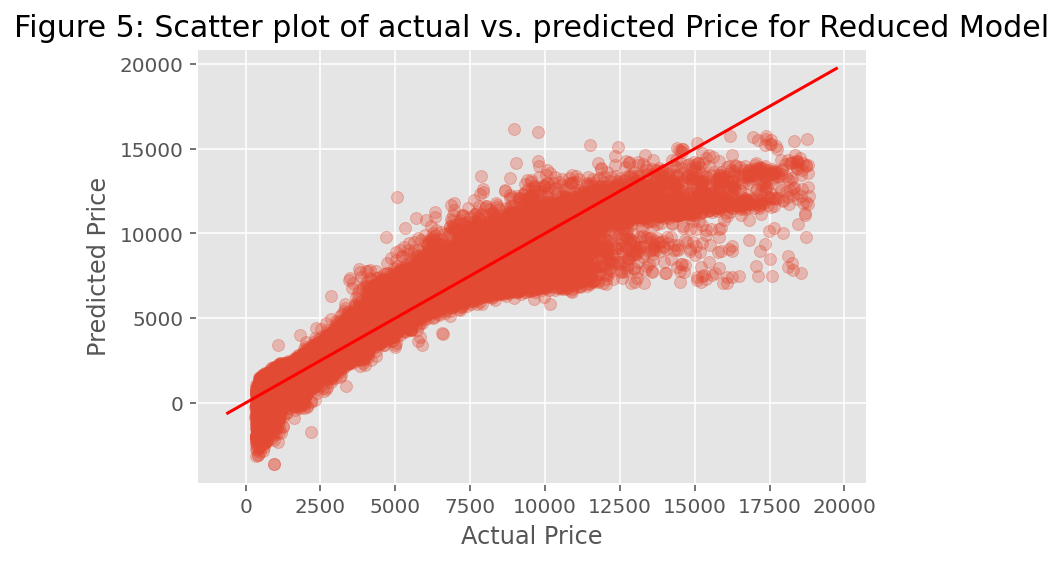

In [28]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 5: Scatter plot of actual vs. predicted Price for Reduced Model', fontsize=15);
plt.show(); 

As expected of the small change, Figure 5 shows almost the same result as the full model, and will need to be deignostic-checked.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

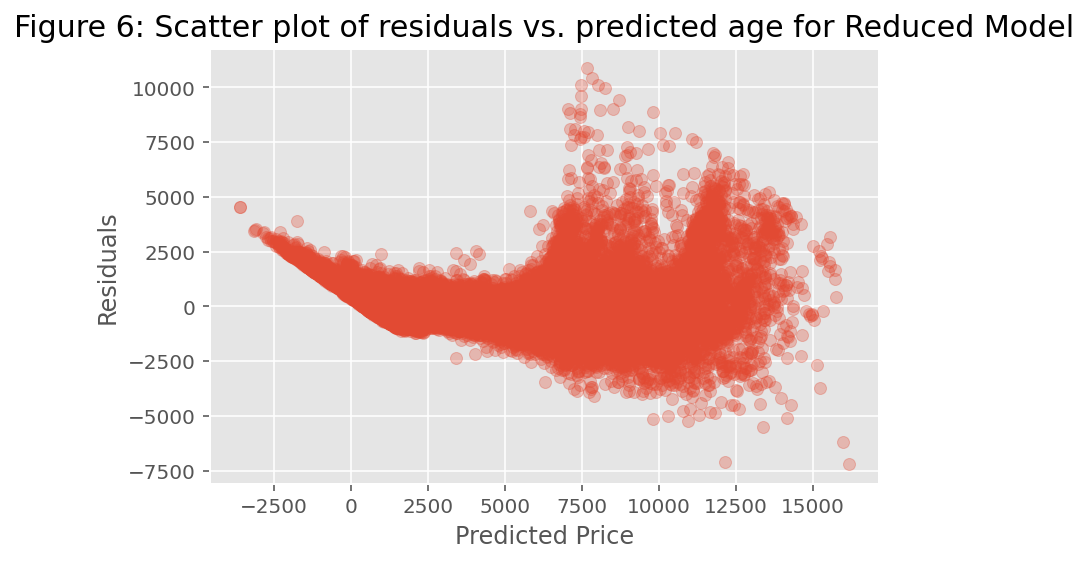

In [29]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 6: Scatter plot of residuals vs. predicted age for Reduced Model', fontsize=15)
plt.show();

Just like Figure 2(a), Figure 6 shows vast spread indicating residual impact.

Now lets take a look at the histogram to see the distribution of residues for the reduced model.

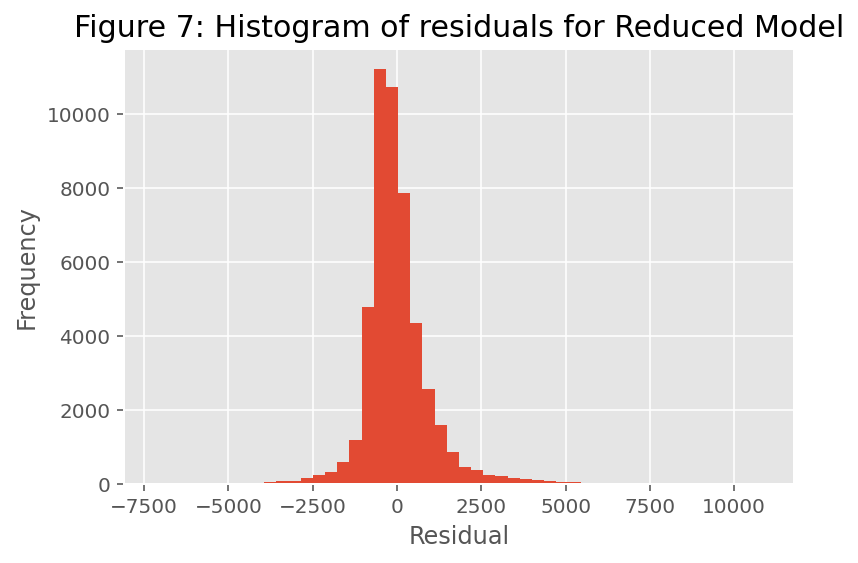

In [30]:
plt.hist(residuals_reduced['residual'], bins = 50);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 7 we can observe that the residual spread is very centered around -2000 to +2000, indicating how it is somewhat normally distributed.

## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

After the modelling, we found the relation R squared value to be 91%. However, due to the shorthandedness of varied features, the results werent at their best. and started to falter wyhen predictions have beens tated to be made on large numbers.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

Initially, we had a dataset providing multiple features of diamonds and their correlating prices. Our goal was to build and demonstrate the relationship between the features and price of a diamond. In doing so, we hope to possibly identifying the core features that affected price. To get more accurate data, we processed the dataset and removed all outlying records. After creating the graphs, we discussed and concluded which features were most significant to a diamond's price.

Now, this report uses a modified dataset of the original to create a stratistical model, under the assumption that the dataset is linearly related, or rather followed MLR (Multiple Linear Regression). We decided to use OLS (Ordinaryleast Squares) model for fitting. By doing that, we acquired a new dataset which told out predictions and followed the residues for each record. Finally, we reviewed our findings, and made the conclusion to the project.

### Summary of Findings

From Phase 1, we found that all the variables had different characteristics, and impacted diamond prices uniformely. Namely, Carat (known formally as diamond-class-weight) had the biggest impact; Table, Cut and Clarity were moderately responsible; and Color had almost no change to the pricing.

In phase 2 we used the data and knowledge from Phase 1 to create a statistical model. We optimised our features to be usable in the modules, and got the relative data. Relative data, such as the residual plot, assisted in observing the findings of the full model. Although our OLS model returned a value of R squared of 0.91, our predictions have been rather erratic. Until the price marks of 10000, the estimation was majorly correct, however after that point, the real data seemed to explode in both the sides, which our fit model couldnt quite follow. The residual spread in the higher number region was not under control. This indicates that after price of $10000, there might be another variable that can further influence the price of diamonds.

### Conclusions

The first phase of the project was successful. Clear relationships were established, and data was adequately filtered. Assumed and found data were closely equal as well. 

The second phase however, was rather unsatisfactory. Meanwhile, our modelling was subpar on the lower ends of the datased, it largely struggled on the higher ends. Observing the findings and the real world data, we found out that there ware lots of anomalies that wouldnt be possible to achieve by using current level of observations and principles. 

In follow-up/future investigations; different model types, focus on other variable around diamond, and vastly more data could prove more sucessful results.